In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Step 1: Investigate the dataset

In [3]:
df = pd.read_csv("D:/projects/CodSoft_Projects/Task3/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### No missing values

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.groupby(df['species']).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


### We can see that there is a noticable difference in the different measurements mean between the classes

# Step 2: Splitting the dataset and Building/Evaluating the models

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

## Data Splitting

In [9]:
X = df.drop(columns=['species'], axis=1)
y = df['species']
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X_train), len(X_test)

(120, 30)

## Model Trianing Pipeline

In [12]:
# Making a pipeline to train the data on different models
pipelines = {
    'gb':make_pipeline(GradientBoostingClassifier()),
    'rf':make_pipeline(RandomForestClassifier()),
    'dt':make_pipeline(DecisionTreeClassifier()),
    'svm':make_pipeline(SVC())
}

In [13]:
fit_models = {}
for algo , pipeline in pipelines.items():
    model = pipeline.fit(X_train , y_train)
    fit_models[algo] = model

## Model Evaluation Pipeline

In [19]:
for algo , model in fit_models.items():
    pred = model.predict(X_test)
    print("The accuracy of {} model is: {}".format(algo , accuracy_score(y_test , pred)))
    print("The precision of {} model is: {}".format(algo , precision_score(y_test , pred, average='weighted')))
    print("The f1 score of {} model is: {}".format(algo , f1_score(y_test , pred, average='weighted')))    
    print()

The accuracy of gb model is: 1.0
The precision of gb model is: 1.0
The f1 score of gb model is: 1.0

The accuracy of rf model is: 1.0
The precision of rf model is: 1.0
The f1 score of rf model is: 1.0

The accuracy of dt model is: 1.0
The precision of dt model is: 1.0
The f1 score of dt model is: 1.0

The accuracy of svm model is: 1.0
The precision of svm model is: 1.0
The f1 score of svm model is: 1.0



## All the models performed well on the test set

### Plotting the Confusion matrix of the Random Forests model

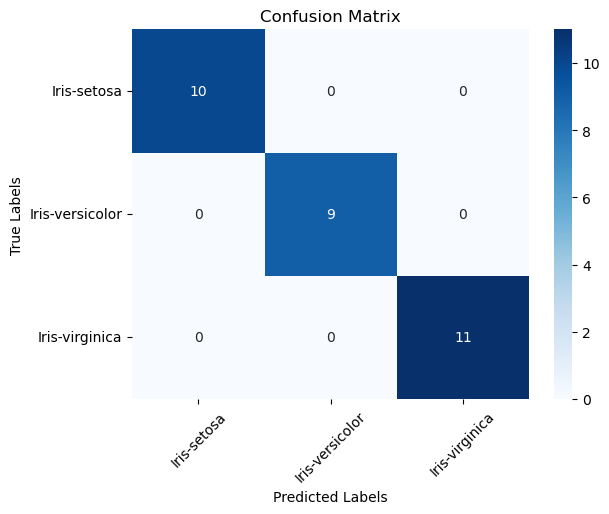

In [22]:
rf = RandomForestClassifier()

model = rf.fit(X_train , y_train)
pred = model.predict(X_test)

cm = confusion_matrix(y_test, pred)

labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

### Saving the best model

In [24]:
import pickle

with open('D:/projects/CodSoft_Projects/Task3/Iris.pkl' , 'wb') as f:
    pickle.dump(fit_models['rf'], f)